In this problem we are given a Excel file with data about diabetes patients
Aim:
•	Identify patients on path to high-cost disease state
•	Assign patient scores based on the severity of condition
•	Seggregate patients for 2 possible care paths
        Care Intervention
        Lower cost of care

Tasks:
1.	Cleanse the data removing blank rows
2.	Handle the outliers and missing data
3.	Implement EDA and determine quality of data and is the data sufficient to achieve any of the above objective
4.	Implement properly the categorical data with proper encoding
5.	Implement proper feature engineering
6.	Use the proper ML algorithm for training the model and data predictions. Leverage supervised or unsupervised algorithms based on the given dataset

The input dataset is uploaded in below link
https://usecasedata1.blob.core.windows.net/diabetesdc/diabetes_data.xlsx

Expected output:
Categorize patient data based on diabetes severity level(high, medium, low)




In [59]:
# Importing the required library's
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline


In [60]:
df=pd.read_excel("diabetes_data.xlsx")
display(df.head())

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [61]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                101766 non-null  object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

None

In [62]:
(df.describe())

,id,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,50883.500000,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,29377.458084,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,25442.250000,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,50883.500000,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,76324.750000,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,101766.000000,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


The data frame is filled with many features out of which id, encounter_id, patient_nbr are unique and they don't have significance compared to others as they are only identifiers

In [63]:
df=df.drop(columns=["id", "encounter_id", "patient_nbr"])
display(df)


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


<Axes: ylabel='count'>

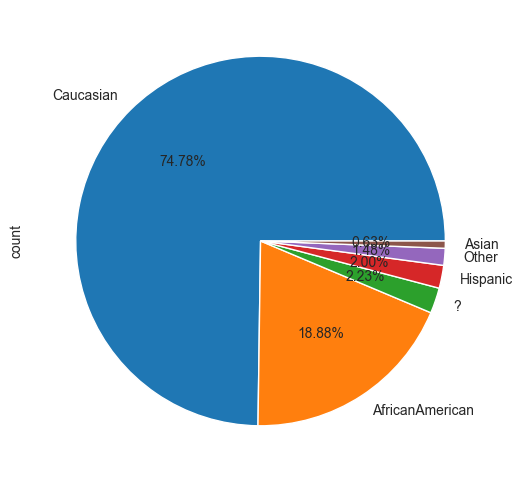

In [64]:
# Finding the distribution of race
df["race"].value_counts().plot.pie(figsize=(16,6),autopct="%.2f%%")

In [65]:
df["race"]=df["race"].replace("?",np.nan)
print(df["race"].isna().sum())
df["race"].isna().sum()*100/df.shape[0]


2273


2.2335554114340743

The null value percent  is equal to the one the above pie chart and seeing the distribution droping will give better results

race                         99493
gender                      101766
age                         101766
weight                      101766
admission_type_id           101766
discharge_disposition_id    101766
admission_source_id         101766
time_in_hospital            101766
payer_code                  101766
medical_specialty           101766
num_lab_procedures          101766
num_procedures              101766
num_medications             101766
number_outpatient           101766
number_emergency            101766
number_inpatient            101766
diag_1                      101766
diag_2                      101766
diag_3                      101766
number_diagnoses            101766
max_glu_serum                 5346
A1Cresult                    17018
metformin                   101766
repaglinide                 101766
nateglinide                 101766
chlorpropamide              101766
glimepiride                 101766
acetohexamide               101766
glipizide           

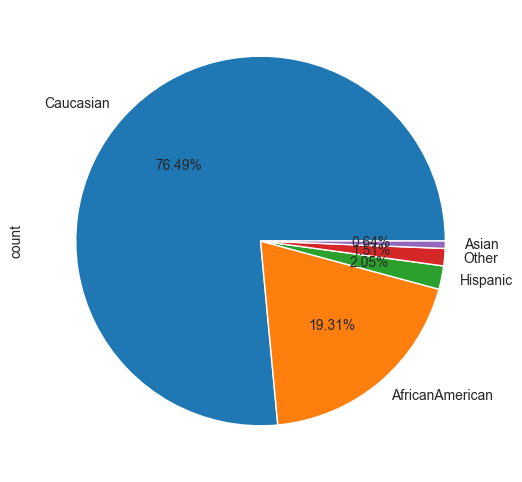

In [66]:
df["race"].dropna(inplace=True)
df["race"].value_counts().plot.pie(figsize=(16,6),autopct="%.2f%%")
df.count()

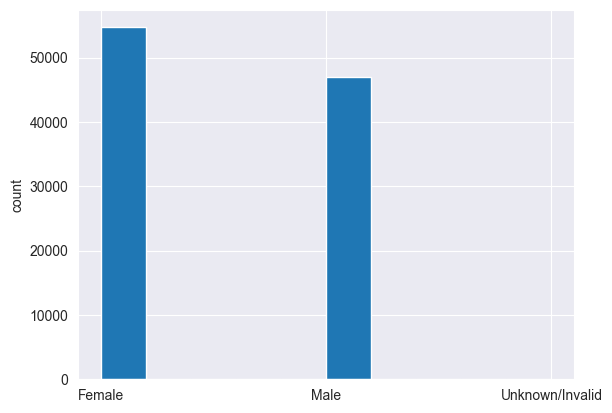

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [67]:
# Finding the distribution of gender
df["gender"].hist()
plt.ylabel("count")
plt.show()
df["gender"].value_counts()

There is only one value without gender so it can be removed

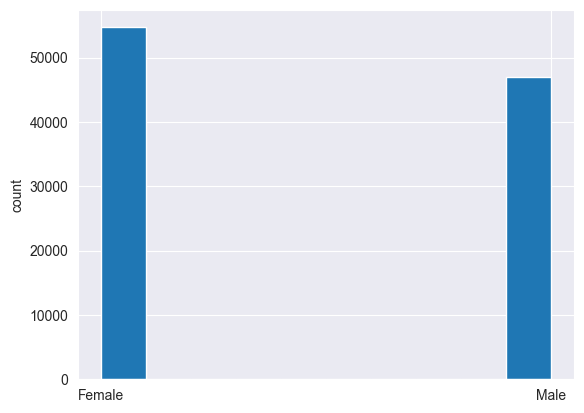

gender
Female    54708
Male      47055
Name: count, dtype: int64

In [68]:
df["gender"] = df["gender"].replace("Unknown/Invalid", np.nan)
df["gender"].dropna(inplace=True)
df["gender"].hist()
plt.ylabel("count")
plt.show()
df["gender"].value_counts()

In [69]:
# Encoding the gender values

df['gender'] = df['gender'].replace({'Female' : 0, 'Male' : 1})

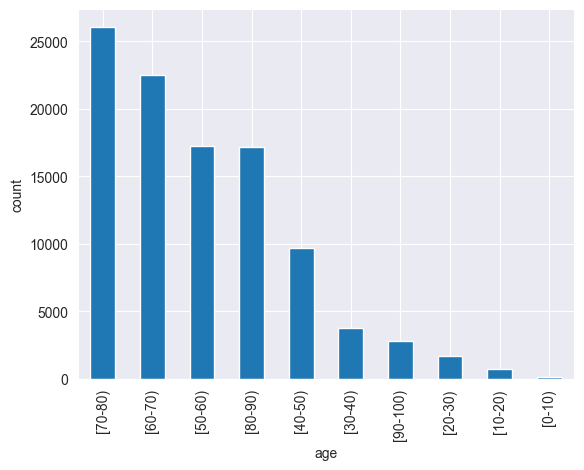

0          [0-10)
1         [10-20)
2         [20-30)
3         [30-40)
4         [40-50)
           ...   
101761    [70-80)
101762    [80-90)
101763    [70-80)
101764    [80-90)
101765    [70-80)
Name: age, Length: 101766, dtype: object


In [70]:
# Checking the age category distribution
df["age"].value_counts().plot(kind="bar")
plt.ylabel("count")
plt.show()
print(df["age"])

Encoding the age data as 0-10, 10-22.... is a string and need to be converted to single numerical value for each category


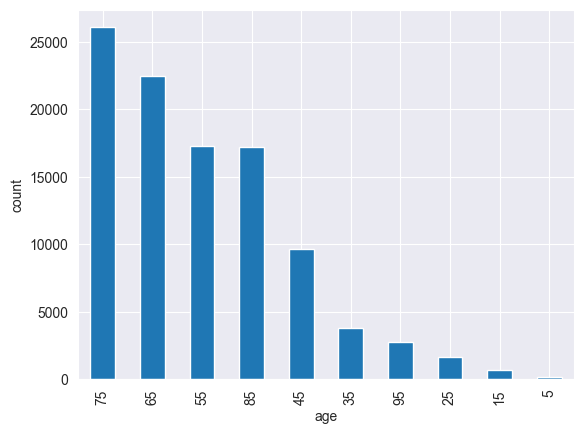

In [71]:

df["age"] = df["age"].map({"[90-100)":95,
                           "[80-90)": 85,
                           "[70-80)": 75,
                           "[60-70)": 65,
                           "[50-60)": 55,
                           "[40-50)": 45,
                           "[30-40)": 35,
                           "[20-30)": 25,
                           "[10-20)": 15,
                           "[0-10)": 5})
df["age"].value_counts().plot(kind="bar")
plt.ylabel("count")
plt.show()

In [72]:
display(df["A1Cresult"].value_counts())


A1Cresult
>8      8216
Norm    4990
>7      3812
Name: count, dtype: int64

In [73]:
df["A1Cresult"]=df["A1Cresult"].map({np.nan:-1,'None':0,
'>8':3,
'Norm':1,
'>7':2})
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,Caucasian,0.0,5,?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,0.0,15,?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,0.0,25,?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,1.0,35,?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,1.0,45,?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,1.0,75,?,1,3,7,3,MC,?,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,0.0,85,?,1,4,5,5,MC,?,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,1.0,75,?,1,1,7,1,MC,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,0.0,85,?,2,3,7,10,MC,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [74]:
# df['A1Cresult_present']=df['A1Cresult'].map({'None':0,
# '>8':1,
# 'Norm':1,
# '>7':1})
# display(df['A1Cresult_present'].value_counts())

In [75]:
display(df['weight'].value_counts())

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

In [76]:
# df['weight_present']=df['weight'].map({'?':0,
# '[75-100)':1,
# '[50-75)':1,
# '[100-125)':1,
# '[125-150)':1,
# '[25-50)':1,
# '[0-25)':1,
# '[150-175)':1,
# '[175-200)':1,
# '>200':1})
# df

In [77]:
# df["weight"]=df["weight"].map({'?':-1,
# '[75-100)':75,
# '[50-75)':50,
# '[100-125)':100,
# '[125-150)':125,
# '[25-50)':25,
# '[0-25)':0,
# '[150-175)':150,
# '[175-200)':175,
# '>200':200})
# df


There is no values in "examide","citoglipton","metformin.rosiglitazone" so droping this as well
payer_code is insignificant in terms of the end result

In [78]:
df.drop(columns=["weight","examide", "citoglipton", "payer_code","metformin.rosiglitazone","admission_type_id","discharge_disposition_id","admission_source_id", 'repaglinide','nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol', 'troglitazone','tolazamide','glyburide.metformin','glipizide.metformin',
'glimepiride.pioglitazone','metformin.pioglitazone',"max_glu_serum"],inplace=True)
df

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,glipizide,insulin,change,diabetesMed,readmitted
0,Caucasian,0.0,5,1,Pediatrics-Endocrinology,41,0,1,0,0,...,?,?,1,-1,No,No,No,No,No,NO
1,Caucasian,0.0,15,3,?,59,0,18,0,0,...,250.01,255,9,-1,No,No,Up,Ch,Yes,>30
2,AfricanAmerican,0.0,25,2,?,11,5,13,2,0,...,250,V27,6,-1,No,Steady,No,No,Yes,NO
3,Caucasian,1.0,35,2,?,44,1,16,0,0,...,250.43,403,7,-1,No,No,Up,Ch,Yes,NO
4,Caucasian,1.0,45,1,?,51,0,8,0,0,...,157,250,5,-1,No,Steady,Steady,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,1.0,75,3,?,51,0,16,0,0,...,291,458,9,3,Steady,No,Down,Ch,Yes,>30
101762,AfricanAmerican,0.0,85,5,?,33,3,18,0,0,...,276,787,9,-1,No,No,Steady,No,Yes,NO
101763,Caucasian,1.0,75,1,?,53,0,9,1,0,...,590,296,13,-1,Steady,No,Down,Ch,Yes,NO
101764,Caucasian,0.0,85,10,Surgery-General,45,2,21,0,0,...,285,998,9,-1,No,Steady,Up,Ch,Yes,NO


In [79]:
df["diag_1"] = pd.to_numeric(df["diag_1"], errors='coerce')
df["diag_1"].count()
df["diag_2"] = pd.to_numeric(df["diag_2"], errors='coerce')
df["diag_3"] = pd.to_numeric(df["diag_3"], errors='coerce')

df.dropna(subset=["diag_1", "diag_2", "diag_3"], inplace=True)


In [80]:
df["medical_specialty"].value_counts()
df["medical_specialty"].map({"?":0})

1         0.0
3         0.0
4         0.0
5         0.0
7         0.0
         ... 
101761    0.0
101762    0.0
101763    0.0
101764    NaN
101765    0.0
Name: medical_specialty, Length: 91844, dtype: float64

In [81]:
df.isna().sum()
df.dropna()


,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,glipizide,insulin,change,diabetesMed,readmitted
1,Caucasian,0.0,15,3,?,59,0,18,0,0,...,250.01,255.0,9,-1,No,No,Up,Ch,Yes,>30
3,Caucasian,1.0,35,2,?,44,1,16,0,0,...,250.43,403.0,7,-1,No,No,Up,Ch,Yes,NO
4,Caucasian,1.0,45,1,?,51,0,8,0,0,...,157.00,250.0,5,-1,No,Steady,Steady,Ch,Yes,NO
5,Caucasian,1.0,55,3,?,31,6,16,0,0,...,411.00,250.0,9,-1,No,No,Steady,No,Yes,>30
7,Caucasian,1.0,75,5,?,73,0,12,0,0,...,492.00,250.0,8,-1,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,1.0,75,3,?,51,0,16,0,0,...,291.00,458.0,9,3,Steady,No,Down,Ch,Yes,>30
101762,AfricanAmerican,0.0,85,5,?,33,3,18,0,0,...,276.00,787.0,9,-1,No,No,Steady,No,Yes,NO
101763,Caucasian,1.0,75,1,?,53,0,9,1,0,...,590.00,296.0,13,-1,Steady,No,Down,Ch,Yes,NO
101764,Caucasian,0.0,85,10,Surgery-General,45,2,21,0,0,...,285.00,998.0,9,-1,No,Steady,Up,Ch,Yes,NO


In [82]:
categorical_features = ['race', 'gender', 'age', 'medical_specialty', 'metformin', 'glipizide',    'insulin', 'change', 'diabetesMed','readmitted']



# Apply one hot encoding encoding to categorical features
label_encoder = LabelEncoder()
for feature in categorical_features:
     df[feature] = label_encoder.fit_transform(df[feature])
df

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,glipizide,insulin,change,diabetesMed,readmitted
1,2,0,1,3,0,59,0,18,0,0,...,250.01,255.0,9,-1,1,1,3,0,1,1
3,2,1,3,2,0,44,1,16,0,0,...,250.43,403.0,7,-1,1,1,3,0,1,2
4,2,1,4,1,0,51,0,8,0,0,...,157.00,250.0,5,-1,1,2,2,0,1,2
5,2,1,5,3,0,31,6,16,0,0,...,411.00,250.0,9,-1,1,1,2,1,1,1
7,2,1,7,5,0,73,0,12,0,0,...,492.00,250.0,8,-1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,7,3,0,51,0,16,0,0,...,291.00,458.0,9,3,2,1,0,0,1,1
101762,0,0,8,5,0,33,3,18,0,0,...,276.00,787.0,9,-1,1,1,2,1,1,2
101763,2,1,7,1,0,53,0,9,1,0,...,590.00,296.0,13,-1,2,1,0,0,1,2
101764,2,0,8,10,62,45,2,21,0,0,...,285.00,998.0,9,-1,1,2,3,0,1,2


array([[<Axes: title={'center': 'race'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'time_in_hospital'}>,
        <Axes: title={'center': 'medical_specialty'}>],
       [<Axes: title={'center': 'num_lab_procedures'}>,
        <Axes: title={'center': 'num_procedures'}>,
        <Axes: title={'center': 'num_medications'}>,
        <Axes: title={'center': 'number_outpatient'}>,
        <Axes: title={'center': 'number_emergency'}>],
       [<Axes: title={'center': 'number_inpatient'}>,
        <Axes: title={'center': 'diag_1'}>,
        <Axes: title={'center': 'diag_2'}>,
        <Axes: title={'center': 'diag_3'}>,
        <Axes: title={'center': 'number_diagnoses'}>],
       [<Axes: title={'center': 'A1Cresult'}>,
        <Axes: title={'center': 'metformin'}>,
        <Axes: title={'center': 'glipizide'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'change'}>],
       [<Axes: title

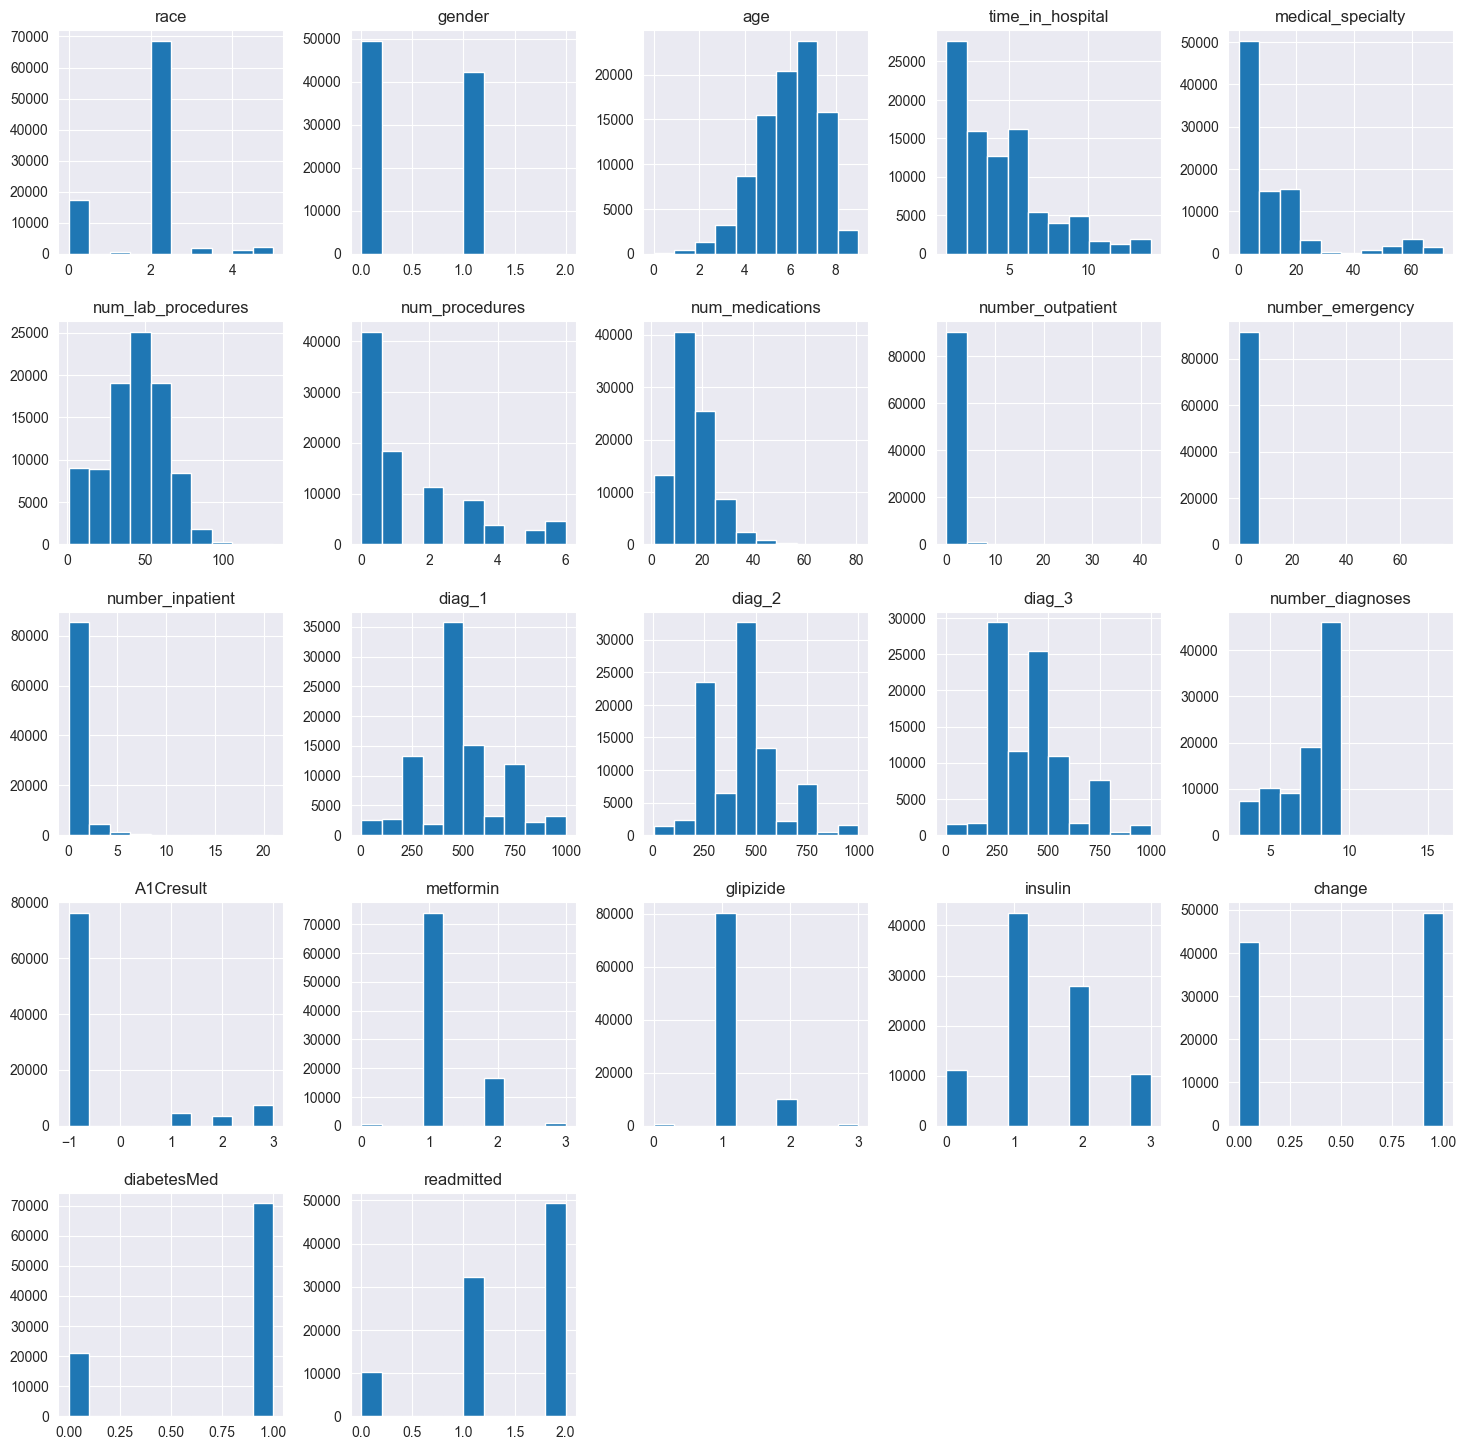

In [83]:

display(df.hist(figsize=(18,18)))




<Axes: >

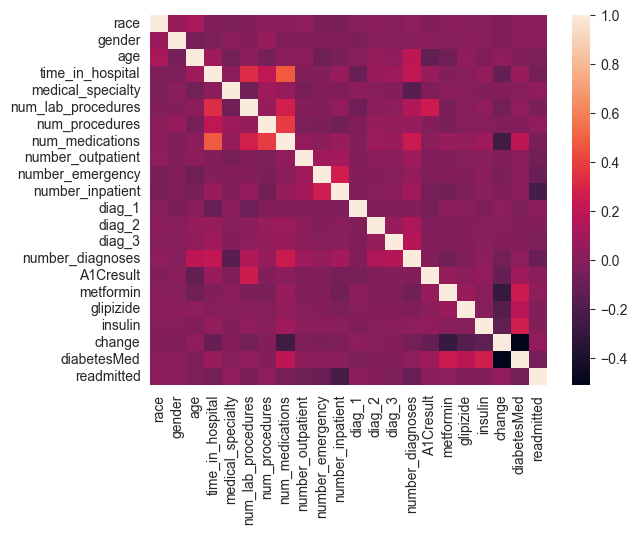

In [84]:
cor=df.corr()
sns.heatmap(cor)

In [85]:
# Handling Outliers using Z-score
z_scores = np.abs((df - df.mean()) / df.std())
display(z_scores )
z_scores.to_excel("zsc.xlsx")
df_no_outliers = df[(z_scores < 3.5).all(axis=1)]  # Keeping rows with Z-score < 3
df_no_outliers.to_excel("cleaned_data.xlsx")

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,glipizide,insulin,change,diabetesMed,readmitted
1,0.272952,0.925358,3.315101,0.480367,0.647643,0.777769,0.789960,0.215422,0.289886,0.212173,...,1.072659,0.923172,0.805752,0.434352,0.447337,0.332309,1.894828,1.076918,0.546766,0.621385
3,0.272952,1.080462,2.025760,0.817124,0.647643,0.017269,0.212166,0.028646,0.289886,0.212173,...,1.070282,0.088063,0.286172,0.434352,0.447337,0.332309,1.894828,1.076918,0.546766,0.840649
4,0.272952,1.080462,1.381089,1.153881,0.647643,0.372169,0.789960,1.004917,0.289886,0.212173,...,1.599156,0.951385,1.378095,0.434352,0.447337,2.403492,0.704816,1.076918,0.546766,0.840649
5,0.272952,1.080462,0.736419,0.480367,0.647643,0.641831,2.676808,0.028646,0.289886,0.212173,...,0.161351,0.951385,0.805752,0.434352,0.447337,0.332309,0.704816,0.928566,0.546766,0.621385
7,0.272952,1.080462,0.552923,0.193146,0.647643,1.487569,0.789960,0.516782,0.289886,0.212173,...,0.297161,0.951385,0.259790,0.434352,0.447337,0.332309,0.485197,0.928566,0.546766,0.621385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1.753069,1.080462,0.552923,0.480367,0.647643,0.372169,0.789960,0.028646,0.289886,0.212173,...,0.840629,0.222282,0.805752,2.771874,1.857586,0.332309,1.675209,1.076918,0.546766,0.621385
101762,1.753069,0.925358,1.197594,0.193146,0.647643,0.540431,0.943424,0.215422,0.289886,0.212173,...,0.925539,2.078707,0.805752,0.434352,0.447337,0.332309,0.704816,0.928566,0.546766,0.840649
101763,0.272952,1.080462,0.552923,1.153881,0.647643,0.473569,0.789960,0.882883,0.487852,0.212173,...,0.851905,0.691824,2.989598,0.434352,1.857586,0.332309,1.675209,1.076918,0.546766,0.840649
101764,0.272952,0.925358,1.197594,1.876931,3.022454,0.067969,0.365629,0.581524,0.289886,0.212173,...,0.874593,3.269301,0.805752,0.434352,0.447337,2.403492,1.894828,1.076918,0.546766,0.840649


In [86]:
df.describe()

,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,diag_2,diag_3,number_diagnoses,A1Cresult,metformin,glipizide,insulin,change,diabetesMed,readmitted
count,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,...,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000,91844.000000
mean,1.730554,0.461337,6.142317,4.426451,10.940824,43.659390,1.367199,16.234735,0.372730,0.200035,...,439.504007,418.606705,7.524161,-0.458114,1.194079,1.121467,1.407724,0.536987,0.769849,1.425014
std,0.987157,0.498549,1.551180,2.969502,16.893282,19.723871,1.730718,8.194439,1.285779,0.942790,...,176.658138,177.222366,1.831631,1.247573,0.433854,0.365524,0.840327,0.498633,0.420932,0.683978
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,5.000000,3.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5.000000,2.000000,0.000000,32.000000,0.000000,11.000000,0.000000,0.000000,...,278.000000,274.000000,6.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
50%,2.000000,0.000000,6.000000,4.000000,4.000000,45.000000,1.000000,15.000000,0.000000,0.000000,...,427.000000,403.000000,9.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,2.000000,1.000000,7.000000,6.000000,18.000000,58.000000,2.000000,20.000000,0.000000,0.000000,...,530.000000,496.000000,9.000000,-1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
max,5.000000,2.000000,9.000000,14.000000,71.000000,132.000000,6.000000,81.000000,42.000000,76.000000,...,999.000000,999.000000,16.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,2.000000
